# **นายกานตภัค ห้วยหงษ์ทอง 63070211**

# **Assignment 1 - Data Collection & Preparation, Exploratory Data Analysis (EDA) and Data Visualization & Report**

# **Task 1: Identify one or more suitable web APIs**
**<font color='crimson'>*API Chosen*</font>**
A single API that was chosen for this assignment was that provided by Spotify Web API

See more at https://developer.spotify.com/documentation/web-api/

I use spotipy library to As the <a href="https://drive.google.com/file/d/1USSG-4NdPYhjE3MaE_MhCkr3SM4DBX4q/view">API_list.txt</a> allow using the spotipy library along to get full access to all of the music data provided by the Spotify platform.

First install the spotipy library.



In [ ]:
pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Create subfolder data for keeping .csv files in the upcoming process.

In [ ]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


Import necessary library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline

pd.set_option('display.max_colwidth', None)
pd.set_option('max_rows', 500)

To use the Web API, start by creating a Spotify user account (Premium or Free). To do that, simply sign up at www.spotify.com.

When you have a user account, go to the Dashboard page at the Spotify Developer website and, if necessary, log in. Accept the latest Developer Terms of Service to complete your account set up.

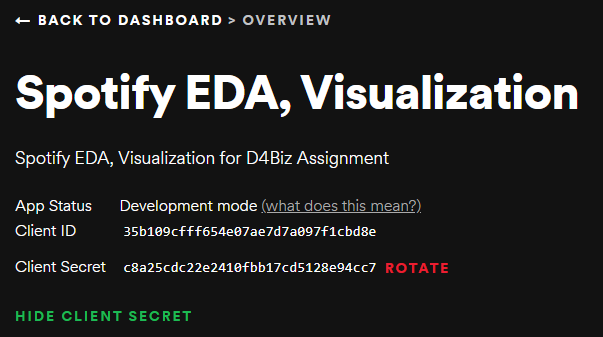

This is where I get my API keys.



In [ ]:
CLIENT_ID = '35b109cfff654e07ae7d7a097f1cbd8e'  # CLIENT_ID
CLIENT_SECRET = 'c8a25cdc22e2410fbb17cd5128e94cc7' #CLIENT_SECRET

กำหนดค่า CLIENT_ID และ CLIENT_SECRET ด้วย key ที่ได้มาจากการสร้าง Dashboard app ใน https://developer.spotify.com/dashboard/applications

# **Task 2: Collect data from chosen API(s)**

Collecting Raw Data

Example on setting up spotipy เพื่อใช้ดึงข้อมูล : https://pypi.org/project/spotipy/

In [ ]:
import spotipy #import library spotipy
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET) #แทน client_id กับ client_secret จากตัวแปรด้านบนที่แทนค่าไว้แล้ว
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

ดึงข้อมูลตัวอย่างโดยใช้ GET /search โดย search query เพื่อค้นหาข้อมูลในปี 2012 และ type = track หรือก็คือข้อมูลเพลงนั่นเอง โดย limit=1 คือ return มาแค่ค่าเดียว ซึ่ง limit ต่อการดึงหนึ่งครั้งมากที่สุดคือ 50
 ref : https://developer.spotify.com/documentation/web-api/reference/#/operations/search

In [ ]:
example_data = sp.search(q='year:2012', type='track', limit=1)
example_data

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=year%3A2012&type=track&offset=0&limit=1',
  'items': [{'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2YZyLoL8N0Wb9xBt1NhZWg'},
       'href': 'https://api.spotify.com/v1/artists/2YZyLoL8N0Wb9xBt1NhZWg',
       'id': '2YZyLoL8N0Wb9xBt1NhZWg',
       'name': 'Kendrick Lamar',
       'type': 'artist',
       'uri': 'spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg'}],
     'available_markets': ['CA', 'MX', 'US'],
     'external_urls': {'spotify': 'https://open.spotify.com/album/6PBZN8cbwkqm1ERj2BGXJ1'},
     'href': 'https://api.spotify.com/v1/albums/6PBZN8cbwkqm1ERj2BGXJ1',
     'id': '6PBZN8cbwkqm1ERj2BGXJ1',
     'images': [{'height': 640,
       'url': 'https://i.scdn.co/image/ab67616d0000b273d28d2ebdedb220e479743797',
       'width': 640},
      {'height': 300,
       'url': 'https://i.scdn.co/image/ab67616d00001e02d28d2ebdedb220e479743797',
       'width': 300},
     

จะเห็นว่าประเภทของข้อมูลเป็น dict

In [ ]:
print(type(example_data))

<class 'dict'>


ทำการเขียนโค้ดเพื่อให้ fetch ข้อมูลเพลงและศิลปินโดยทำการดึงหลายๆครั้งเพื่อให้ได้ข้อมูลมากกว่า 500 records

โดยจะทำการดึงข้อมูลเพลงในปี 2010 และปี 2021 มาอย่างละ 500 records

In [ ]:
artist_name, track_name, track_popularity, artist_id, track_id, track_date = [], [], [], [], [], [] # assign list to collect data
for i in range(0,500,50):
    track_2010 = sp.search(q='year:2010', type='track', limit=50,offset=i) # search query ข้อมูลปี 2010 type=track return ผลลัพธ์ทีละ 50 ผลลัพธ์
    for t in (track_2010['tracks']['items']):
        # append ข้อมูลลงใน list
        artist_name.append(t['artists'][0]['name']) 
        artist_id.append(t['artists'][0]['id'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        track_popularity.append(t['popularity'])
        track_date.append(t['album']['release_date'])
    track_2021 = sp.search(q='year:2021', type='track', limit=50,offset=i) # search query ข้อมูลปี 2021 type=track return ผลลัพธ์ทีละ 50 ผลลัพธ์
    for t in (track_2021['tracks']['items']):
        # append ข้อมูลลงใน list
        artist_name.append(t['artists'][0]['name']) # ชื่อศิลปิน
        artist_id.append(t['artists'][0]['id']) # ไอดีศิลปิน
        track_name.append(t['name']) # ชื่อเพลง
        track_id.append(t['id']) # ไอดีเพลง
        track_popularity.append(t['popularity']) # ค่า popularity ของเพลง
        track_date.append(t['album']['release_date']) # วันที่ปล่อยเพลง (ตามวันปล่อยอัลบัม)


# **Task 3: Parse the collected data, and store it in an appropriate file format for subsequent analysis**

store the data into Dataframe
This data needs extensive cleaning and manipulation before it can be used

สร้าง dataframe ที่มี column artist_name, track_name, track_popularity, artist_id, track_id, release_date

In [ ]:
track_df = pd.DataFrame({'artist_name' : artist_name,
                         'track_name' : track_name,
                         'track_popularity' : track_popularity,
                         'artist_id' : artist_id, 
                         'track_id' : track_id,
                         'release_date' : track_date,
                         })

แสดงผลลัพธ์ของ dataframe track_df

In [ ]:
track_df.head()

,artist_name,track_name,track_popularity,artist_id,track_id,release_date
0,Mac Miller,The Spins,82,4LLpKhyESsyAXpc4laK94U,51pshtuYkgUQnt5huMPbKL,2010-08-13
1,Kanye West,Devil In A New Dress,80,5K4W6rqBFWDnAN6FQUkS6x,1UGD3lW3tDmgZfAVDh6w7r,2010-11-22
2,Bruno Mars,Just the Way You Are,82,0du5cEVh5yTK9QJze8zA0C,7BqBn9nzAq8spo5e7cZ0dJ,2010-10-05
3,Bruno Mars,Talking to the Moon,82,0du5cEVh5yTK9QJze8zA0C,161DnLWsx1i3u1JT05lzqU,2010-10-05
4,Kanye West,Runaway,80,5K4W6rqBFWDnAN6FQUkS6x,3DK6m7It6Pw857FcQftMds,2010-11-22


In [ ]:
track_df.shape

(1000, 6)

จะเห็นได้ว่ามีจำนวน row ทั้งหมด 1000 row

ทำการดึงข้อมูลศิลปินตัวอย่างโดยใช้ id จาก column artist_id ด้านบน

ref : https://developer.spotify.com/documentation/web-api/reference/#/operations/get-an-artist

In [ ]:
example_artist = sp.artist('0du5cEVh5yTK9QJze8zA0C')
example_artist

{'external_urls': {'spotify': 'https://open.spotify.com/artist/0du5cEVh5yTK9QJze8zA0C'},
 'followers': {'href': None, 'total': 43215789},
 'genres': ['dance pop', 'pop'],
 'href': 'https://api.spotify.com/v1/artists/0du5cEVh5yTK9QJze8zA0C',
 'id': '0du5cEVh5yTK9QJze8zA0C',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/ab6761610000e5ebc36dd9eb55fb0db4911f25dd',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/ab67616100005174c36dd9eb55fb0db4911f25dd',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/ab6761610000f178c36dd9eb55fb0db4911f25dd',
   'width': 160}],
 'name': 'Bruno Mars',
 'popularity': 87,
 'type': 'artist',
 'uri': 'spotify:artist:0du5cEVh5yTK9QJze8zA0C'}

ทำเหมือนเดิม คือทำการ assign list ไว้เพื่อเก็บข้อมูล ค่า popularity ของศิลปิน แนวเพลง และ ยอดผู้ติดตามของศิลปิน

In [ ]:
artist_popularity, genres, artist_followers = [], [], []
# ดึงข้อมูลตาม id ที่อยู่ใน column artist_id
for a in track_df.artist_id:
  artist = sp.artist(a)
  artist_popularity.append(artist['popularity'])
  genres.append(artist['genres'])
  artist_followers.append(artist['followers']['total'])

assign list เพิ่มเข้าไปเป็น column ใน track_df dataframe

In [ ]:
track_df = track_df.assign(artist_popularity=artist_popularity, genres=genres, artist_followers=artist_followers)
track_df

,artist_name,track_name,track_popularity,artist_id,track_id,release_date,artist_popularity,genres,artist_followers
0,Mac Miller,The Spins,82,4LLpKhyESsyAXpc4laK94U,51pshtuYkgUQnt5huMPbKL,2010-08-13,83,"[hip hop, pittsburgh rap, rap]",7979155
1,Kanye West,Devil In A New Dress,80,5K4W6rqBFWDnAN6FQUkS6x,1UGD3lW3tDmgZfAVDh6w7r,2010-11-22,91,"[chicago rap, rap]",18224254
2,Bruno Mars,Just the Way You Are,82,0du5cEVh5yTK9QJze8zA0C,7BqBn9nzAq8spo5e7cZ0dJ,2010-10-05,87,"[dance pop, pop]",43215789
3,Bruno Mars,Talking to the Moon,82,0du5cEVh5yTK9QJze8zA0C,161DnLWsx1i3u1JT05lzqU,2010-10-05,87,"[dance pop, pop]",43215789
4,Kanye West,Runaway,80,5K4W6rqBFWDnAN6FQUkS6x,3DK6m7It6Pw857FcQftMds,2010-11-22,91,"[chicago rap, rap]",18224254
...,...,...,...,...,...,...,...,...,...
995,TOMORROW X TOGETHER,LO$ER=LO♡ER,76,0ghlgldX5Dd6720Q3qFyQB,21aOLk12MksET8AsbU0SI6,2021-08-17,77,"[k-pop, k-pop boy group]",6807293
996,Fuerza Regida,Descansando,71,0ys2OFYzWYB5hRDLCsBqxt,3QXBaUQ8iwP2WI1GpQIP18,2021-10-22,77,"[corrido, corridos tumbados, musica mexicana, nueva musica mexicana, sierreno]",1866922
997,Joyner Lucas,Your Heart,68,6C1ohJrd5VydigQtaGy5Wa,2DTpP3caqX3QdJIEoS83mD,2021-09-24,71,"[boston hip hop, hip hop, pop rap, rap]",1951737
998,Taylor Swift,I Knew You Were Trouble (Taylor's Version),73,06HL4z0CvFAxyc27GXpf02,6AtZLIzUINvExIUy4QhdjP,2021-11-12,94,[pop],58840286


ทีนี้เราจะทำการดึงค่า features ของตัวเพลงออกมา โดยใช้คำสั่ง sp.audio_features(id) โดยจะได้ผลลัพธ์ออกมาดังนี้

ref : https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features

In [ ]:
example_feat = sp.audio_features('1IHWl5LamUGEuP4ozKQSXZ') # ตัวอย่างของการดึงข้อมูล sp.audio_features(id)
example_feat

[{'danceability': 0.65,
  'energy': 0.715,
  'key': 5,
  'loudness': -5.198,
  'mode': 0,
  'speechiness': 0.253,
  'acousticness': 0.0993,
  'instrumentalness': 0.000291,
  'liveness': 0.126,
  'valence': 0.187,
  'tempo': 106.672,
  'type': 'audio_features',
  'id': '1IHWl5LamUGEuP4ozKQSXZ',
  'uri': 'spotify:track:1IHWl5LamUGEuP4ozKQSXZ',
  'track_href': 'https://api.spotify.com/v1/tracks/1IHWl5LamUGEuP4ozKQSXZ',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1IHWl5LamUGEuP4ozKQSXZ',
  'duration_ms': 243717,
  'time_signature': 4}]

In [ ]:
# example_feat['danceability']  จะขึ้น error จึงต้องใส่ index ที่เป็น int ก่อน
# TypeError: list indices must be integers or slices, not str

In [ ]:
example_feat[0]['danceability']

0.65

ทำการสร้าง list และเก็บผลลัพธ์ที่ได้จากคำสั่ง sp.audio_features 

In [ ]:
danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo, ids = [], [], [], [], [], [], [], [], [], []
# ดึงข้อมูลตาม id ที่อยู่ใน column track_id (ไอดีเพลง)
for id in track_df.track_id:
  af = sp.audio_features(id)  
  danceability.append(af[0]['danceability'])
  energy.append(af[0]['energy'])
  loudness.append(af[0]['loudness'])
  speechiness.append(af[0]['speechiness'])
  acousticness.append(af[0]['acousticness'])
  instrumentalness.append(af[0]['instrumentalness'])
  liveness.append(af[0]['liveness'])
  valence.append(af[0]['valence'])
  tempo.append(af[0]['tempo'])
  ids.append(af[0]['id'])


โดยค่าที่เราจะใช้คือ danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo, และ id

โดยความหมายของแต่ละค่าจะอธิบายภายหลัง

ทำการ assign ผลลัพธ์เข้าไปใน track_df dataframe เป็น column เพิ่มเติม

In [ ]:
sp_df = track_df.assign(danceability=danceability,
                      energy=energy,
                      loudness=loudness,
                      speechiness=speechiness,
                      acousticness=acousticness,
                      instrumentalness=instrumentalness,
                      liveness=liveness,
                      valence=valence,
                      tempo=tempo,
                      id=ids)

แสดง sp_df

In [ ]:
sp_df.head()

,artist_name,track_name,track_popularity,artist_id,track_id,release_date,artist_popularity,genres,artist_followers,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id
0,Mac Miller,The Spins,82,4LLpKhyESsyAXpc4laK94U,51pshtuYkgUQnt5huMPbKL,2010-08-13,83,"[hip hop, pittsburgh rap, rap]",7979155,0.794,0.766,-3.894,0.0377,0.0135,0.00000,0.0785,0.5500,127.007,51pshtuYkgUQnt5huMPbKL
1,Kanye West,Devil In A New Dress,80,5K4W6rqBFWDnAN6FQUkS6x,1UGD3lW3tDmgZfAVDh6w7r,2010-11-22,91,"[chicago rap, rap]",18224254,0.435,0.760,-4.935,0.0721,0.0175,0.00000,0.1580,0.2060,80.082,1UGD3lW3tDmgZfAVDh6w7r
2,Bruno Mars,Just the Way You Are,82,0du5cEVh5yTK9QJze8zA0C,7BqBn9nzAq8spo5e7cZ0dJ,2010-10-05,87,"[dance pop, pop]",43215789,0.635,0.841,-5.379,0.0422,0.0134,0.00000,0.0622,0.4240,109.021,7BqBn9nzAq8spo5e7cZ0dJ
3,Bruno Mars,Talking to the Moon,82,0du5cEVh5yTK9QJze8zA0C,161DnLWsx1i3u1JT05lzqU,2010-10-05,87,"[dance pop, pop]",43215789,0.498,0.590,-4.721,0.0320,0.5110,0.00000,0.1070,0.0784,145.867,161DnLWsx1i3u1JT05lzqU
4,Kanye West,Runaway,80,5K4W6rqBFWDnAN6FQUkS6x,3DK6m7It6Pw857FcQftMds,2010-11-22,91,"[chicago rap, rap]",18224254,0.374,0.568,-3.825,0.1090,0.2190,0.00219,0.5130,0.1110,84.733,3DK6m7It6Pw857FcQftMds


ทำการ save sp_df เป็นไฟล์ csv ลงไปใน directory ที่สร้างมาก่อนหน้าโดยคำสั่ง to_csv

In [ ]:
sp_df.to_csv('/content/data/sp_df.csv',index=False) # index=False เพื่อ avoid Unnamed index

# **Task 4: Load and represent the data using an appropriate data structure. Apply any pre-processing steps to clean/filter/combine the data**

ทำการอ่านไฟล์ csv โดยใช้คำสั่ง pd.read_csv

In [ ]:
df = pd.read_csv('/content/data/sp_df.csv')
df.head()

,artist_name,track_name,track_popularity,artist_id,track_id,release_date,artist_popularity,genres,artist_followers,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id
0,Mac Miller,The Spins,82,4LLpKhyESsyAXpc4laK94U,51pshtuYkgUQnt5huMPbKL,2010-08-13,83,"['hip hop', 'pittsburgh rap', 'rap']",7979155,0.794,0.766,-3.894,0.0377,0.0135,0.00000,0.0785,0.5500,127.007,51pshtuYkgUQnt5huMPbKL
1,Kanye West,Devil In A New Dress,80,5K4W6rqBFWDnAN6FQUkS6x,1UGD3lW3tDmgZfAVDh6w7r,2010-11-22,91,"['chicago rap', 'rap']",18224254,0.435,0.760,-4.935,0.0721,0.0175,0.00000,0.1580,0.2060,80.082,1UGD3lW3tDmgZfAVDh6w7r
2,Bruno Mars,Just the Way You Are,82,0du5cEVh5yTK9QJze8zA0C,7BqBn9nzAq8spo5e7cZ0dJ,2010-10-05,87,"['dance pop', 'pop']",43215789,0.635,0.841,-5.379,0.0422,0.0134,0.00000,0.0622,0.4240,109.021,7BqBn9nzAq8spo5e7cZ0dJ
3,Bruno Mars,Talking to the Moon,82,0du5cEVh5yTK9QJze8zA0C,161DnLWsx1i3u1JT05lzqU,2010-10-05,87,"['dance pop', 'pop']",43215789,0.498,0.590,-4.721,0.0320,0.5110,0.00000,0.1070,0.0784,145.867,161DnLWsx1i3u1JT05lzqU
4,Kanye West,Runaway,80,5K4W6rqBFWDnAN6FQUkS6x,3DK6m7It6Pw857FcQftMds,2010-11-22,91,"['chicago rap', 'rap']",18224254,0.374,0.568,-3.825,0.1090,0.2190,0.00219,0.5130,0.1110,84.733,3DK6m7It6Pw857FcQftMds


ใช้คำสั่ง describe() เพื่อดูค่า descriptive statistic ของ dataframe

In [ ]:
df.describe().transpose() # transpose column เพื่อความง่ายต่อการดู

,count,mean,std,min,25%,50%,75%,max
track_popularity,1000.0,6.988300e+01,8.337915e+00,53.000000,63.000000,7.000000e+01,7.600000e+01,9.200000e+01
artist_popularity,1000.0,7.422400e+01,1.171346e+01,36.000000,65.000000,7.400000e+01,8.300000e+01,1.000000e+02
artist_followers,1000.0,1.202290e+07,1.992097e+07,301.000000,702917.000000,2.913388e+06,1.000345e+07,1.024363e+08
danceability,1000.0,6.300630e-01,1.500397e-01,0.161000,0.531000,6.395000e-01,7.412500e-01,9.680000e-01
energy,1000.0,6.691824e-01,1.868716e-01,0.002170,0.560750,6.895000e-01,8.062500e-01,1.000000e+00
loudness,1000.0,-6.250861e+00,3.003064e+00,-44.761000,-7.354000,-5.673000e+00,-4.507750e+00,-5.170000e-01
speechiness,1000.0,1.010254e-01,9.894013e-02,0.022800,0.035050,5.530000e-02,1.212500e-01,6.190000e-01
acousticness,1000.0,2.173533e-01,2.517123e-01,0.000012,0.018075,1.160000e-01,3.435000e-01,9.890000e-01
instrumentalness,1000.0,3.233799e-02,1.453956e-01,0.000000,0.000000,0.000000e+00,5.555000e-05,9.870000e-01
liveness,1000.0,1.874196e-01,1.475545e-01,0.025000,0.098550,1.260000e-01,2.330000e-01,9.430000e-01


ใช้คำสั่ง info() เพื่อดูค่า null และ type ของ column

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   artist_name        1000 non-null   object 
 1   track_name         1000 non-null   object 
 2   track_popularity   1000 non-null   int64  
 3   artist_id          1000 non-null   object 
 4   track_id           1000 non-null   object 
 5   release_date       1000 non-null   object 
 6   artist_popularity  1000 non-null   int64  
 7   genres             1000 non-null   object 
 8   artist_followers   1000 non-null   int64  
 9   danceability       1000 non-null   float64
 10  energy             1000 non-null   float64
 11  loudness           1000 non-null   float64
 12  speechiness        1000 non-null   float64
 13  acousticness       1000 non-null   float64
 14  instrumentalness   1000 non-null   float64
 15  liveness           1000 non-null   float64
 16  valence            1000 n

เช็คว่ามีค่า null หรือไม่

In [ ]:
df.isnull().sum()

artist_name          0
track_name           0
track_popularity     0
artist_id            0
track_id             0
release_date         0
artist_popularity    0
genres               0
artist_followers     0
danceability         0
energy               0
loudness             0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
id                   0
dtype: int64

In [ ]:
df.head(20)

,artist_name,track_name,track_popularity,artist_id,track_id,release_date,artist_popularity,genres,artist_followers,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id
0,Mac Miller,The Spins,82,4LLpKhyESsyAXpc4laK94U,51pshtuYkgUQnt5huMPbKL,2010-08-13,83,"['hip hop', 'pittsburgh rap', 'rap']",7979155,0.794,0.766,-3.894,0.0377,0.01350,0.000000,0.0785,0.5500,127.007,51pshtuYkgUQnt5huMPbKL
1,Kanye West,Devil In A New Dress,80,5K4W6rqBFWDnAN6FQUkS6x,1UGD3lW3tDmgZfAVDh6w7r,2010-11-22,91,"['chicago rap', 'rap']",18224254,0.435,0.760,-4.935,0.0721,0.01750,0.000000,0.1580,0.2060,80.082,1UGD3lW3tDmgZfAVDh6w7r
2,Bruno Mars,Just the Way You Are,82,0du5cEVh5yTK9QJze8zA0C,7BqBn9nzAq8spo5e7cZ0dJ,2010-10-05,87,"['dance pop', 'pop']",43215789,0.635,0.841,-5.379,0.0422,0.01340,0.000000,0.0622,0.4240,109.021,7BqBn9nzAq8spo5e7cZ0dJ
3,Bruno Mars,Talking to the Moon,82,0du5cEVh5yTK9QJze8zA0C,161DnLWsx1i3u1JT05lzqU,2010-10-05,87,"['dance pop', 'pop']",43215789,0.498,0.590,-4.721,0.0320,0.51100,0.000000,0.1070,0.0784,145.867,161DnLWsx1i3u1JT05lzqU
4,Kanye West,Runaway,80,5K4W6rqBFWDnAN6FQUkS6x,3DK6m7It6Pw857FcQftMds,2010-11-22,91,"['chicago rap', 'rap']",18224254,0.374,0.568,-3.825,0.1090,0.21900,0.002190,0.5130,0.1110,84.733,3DK6m7It6Pw857FcQftMds
5,Miguel,Sure Thing,79,360IAlyVv4PCEVjgyMZrxK,0JXXNGljqupsJaZsgSbMZV,2010-11-26,77,"['dance pop', 'pop', 'r&b', 'urban contemporary']",4201786,0.684,0.607,-8.127,0.1000,0.02670,0.000307,0.1910,0.4980,81.001,0JXXNGljqupsJaZsgSbMZV
6,Waka Flocka Flame,No Hands (feat. Roscoe Dash & Wale),77,6f4XkbvYlXMH0QgVRzW0sM,03tqyYWC9Um2ZqU0ZN849H,2010-10-01,65,"['atl hip hop', 'dirty south rap', 'gangster rap', 'pop rap', 'rap', 'southern hip hop', 'trap']",2491477,0.760,0.595,-6.366,0.0391,0.00544,0.000000,0.2410,0.3610,131.497,03tqyYWC9Um2ZqU0ZN849H
7,Nicki Minaj,Super Bass,81,0hCNtLu0JehylgoiP8L4Gh,3hlksXnvbKogFdPbpO9vel,2010-11-22,87,"['dance pop', 'hip pop', 'pop', 'queens hip hop', 'rap']",26092374,0.723,0.860,-4.357,0.2030,0.27100,0.000005,0.5980,0.6670,126.979,3hlksXnvbKogFdPbpO9vel
8,Bruno Mars,Grenade,78,0du5cEVh5yTK9QJze8zA0C,2tJulUYLDKOg9XrtVkMgcJ,2010-10-05,87,"['dance pop', 'pop']",43215789,0.704,0.558,-7.273,0.0542,0.14800,0.000000,0.1070,0.2450,110.444,2tJulUYLDKOg9XrtVkMgcJ
9,Patrick Watson,Je te laisserai des mots,84,7bPs6jf983f0bjRAt1yxDM,0V5cvmTKsYmF5FmGGEAfmS,2010-09-10,70,[],492934,0.303,0.187,-16.757,0.0356,0.98900,0.489000,0.1010,0.2130,132.731,0V5cvmTKsYmF5FmGGEAfmS


จะเห็นได้ว่า column genres ยังมีค่า null เป็น [] ซึ่งไม่แสดงในคำสั่ง isnull()

ทำการ cleaning data โดยค้นหา track_name ที่มี genres เป็น null

In [ ]:
genres_null = df.loc[(df['genres'] == '[]')]
genres_null[['track_name', 'artist_name', 'genres']]

,track_name,artist_name,genres
9,Je te laisserai des mots,Patrick Watson,[]
50,Sunroof,Nicky Youre,[]
94,We Don't Talk About Bruno,Carolina Gaitán - La Gaita,[]
140,Caraphernelia,Pierce The Veil,[]
172,raining for hours,ame,[]
191,Surface Pressure,Jessica Darrow,[]
220,Bulletproof Love,Pierce The Veil,[]
256,Close Eyes,DVRST,[]
257,You're a Fucking Bitch Hope You Know That Shit,Atlus,[]
268,The Family Madrigal,Stephanie Beatriz,[]


แสดงค่า mode ของ column genres

In [ ]:
df["genres"].mode()

0    ['pop']
dtype: object

ทำการแทนค่า null [] ด้วย mode ซึ่งก็คือ ['pop']

In [ ]:
df.loc[df["genres"] == "[]", "genres"] = df["genres"].mode()[0]

จะเห็นได้ว่า track_name ที่มี genres เป็น [] ไม่มีแล้ว

In [ ]:
df.loc[(df['genres'] == '[]')].shape

(0, 19)

In [ ]:
df.head(20)

,artist_name,track_name,track_popularity,artist_id,track_id,release_date,artist_popularity,genres,artist_followers,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id
0,Mac Miller,The Spins,82,4LLpKhyESsyAXpc4laK94U,51pshtuYkgUQnt5huMPbKL,2010-08-13,83,"['hip hop', 'pittsburgh rap', 'rap']",7979155,0.794,0.766,-3.894,0.0377,0.01350,0.000000,0.0785,0.5500,127.007,51pshtuYkgUQnt5huMPbKL
1,Kanye West,Devil In A New Dress,80,5K4W6rqBFWDnAN6FQUkS6x,1UGD3lW3tDmgZfAVDh6w7r,2010-11-22,91,"['chicago rap', 'rap']",18224254,0.435,0.760,-4.935,0.0721,0.01750,0.000000,0.1580,0.2060,80.082,1UGD3lW3tDmgZfAVDh6w7r
2,Bruno Mars,Just the Way You Are,82,0du5cEVh5yTK9QJze8zA0C,7BqBn9nzAq8spo5e7cZ0dJ,2010-10-05,87,"['dance pop', 'pop']",43215789,0.635,0.841,-5.379,0.0422,0.01340,0.000000,0.0622,0.4240,109.021,7BqBn9nzAq8spo5e7cZ0dJ
3,Bruno Mars,Talking to the Moon,82,0du5cEVh5yTK9QJze8zA0C,161DnLWsx1i3u1JT05lzqU,2010-10-05,87,"['dance pop', 'pop']",43215789,0.498,0.590,-4.721,0.0320,0.51100,0.000000,0.1070,0.0784,145.867,161DnLWsx1i3u1JT05lzqU
4,Kanye West,Runaway,80,5K4W6rqBFWDnAN6FQUkS6x,3DK6m7It6Pw857FcQftMds,2010-11-22,91,"['chicago rap', 'rap']",18224254,0.374,0.568,-3.825,0.1090,0.21900,0.002190,0.5130,0.1110,84.733,3DK6m7It6Pw857FcQftMds
5,Miguel,Sure Thing,79,360IAlyVv4PCEVjgyMZrxK,0JXXNGljqupsJaZsgSbMZV,2010-11-26,77,"['dance pop', 'pop', 'r&b', 'urban contemporary']",4201786,0.684,0.607,-8.127,0.1000,0.02670,0.000307,0.1910,0.4980,81.001,0JXXNGljqupsJaZsgSbMZV
6,Waka Flocka Flame,No Hands (feat. Roscoe Dash & Wale),77,6f4XkbvYlXMH0QgVRzW0sM,03tqyYWC9Um2ZqU0ZN849H,2010-10-01,65,"['atl hip hop', 'dirty south rap', 'gangster rap', 'pop rap', 'rap', 'southern hip hop', 'trap']",2491477,0.760,0.595,-6.366,0.0391,0.00544,0.000000,0.2410,0.3610,131.497,03tqyYWC9Um2ZqU0ZN849H
7,Nicki Minaj,Super Bass,81,0hCNtLu0JehylgoiP8L4Gh,3hlksXnvbKogFdPbpO9vel,2010-11-22,87,"['dance pop', 'hip pop', 'pop', 'queens hip hop', 'rap']",26092374,0.723,0.860,-4.357,0.2030,0.27100,0.000005,0.5980,0.6670,126.979,3hlksXnvbKogFdPbpO9vel
8,Bruno Mars,Grenade,78,0du5cEVh5yTK9QJze8zA0C,2tJulUYLDKOg9XrtVkMgcJ,2010-10-05,87,"['dance pop', 'pop']",43215789,0.704,0.558,-7.273,0.0542,0.14800,0.000000,0.1070,0.2450,110.444,2tJulUYLDKOg9XrtVkMgcJ
9,Patrick Watson,Je te laisserai des mots,84,7bPs6jf983f0bjRAt1yxDM,0V5cvmTKsYmF5FmGGEAfmS,2010-09-10,70,['pop'],492934,0.303,0.187,-16.757,0.0356,0.98900,0.489000,0.1010,0.2130,132.731,0V5cvmTKsYmF5FmGGEAfmS


ทำให้ release_date เหลือแค่ปีเพื่อง่ายต่อการ query ข้อมูล

In [ ]:
date = df["release_date"].str.split("-", n = 3, expand = True) # แยกวันเดือนปีโดย split จากเครื่องหมาย -
date

,0,1,2
0,2010,08,13
1,2010,11,22
2,2010,10,05
3,2010,10,05
4,2010,11,22
...,...,...,...
995,2021,08,17
996,2021,10,22
997,2021,09,24
998,2021,11,12


ทำการสร้าง column ใหม่ release_year โดยให้ค่าเป็น column แรกของ date ซึ่งก็คือ ปี

In [ ]:
df["release_year"] = date[0]

ทำการ drop column release_date ออก

In [ ]:
df.drop(columns=["release_date"], inplace=True)

จะเห็นได้ว่ามี column ที่มีค่าซ้ำกันนั่นคือ track_id กับ id จึงต้องทำการลบ column id ออก

In [ ]:
df.head()

,artist_name,track_name,track_popularity,artist_id,track_id,artist_popularity,genres,artist_followers,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,release_year
0,Mac Miller,The Spins,82,4LLpKhyESsyAXpc4laK94U,51pshtuYkgUQnt5huMPbKL,83,"['hip hop', 'pittsburgh rap', 'rap']",7979155,0.794,0.766,-3.894,0.0377,0.0135,0.00000,0.0785,0.5500,127.007,51pshtuYkgUQnt5huMPbKL,2010
1,Kanye West,Devil In A New Dress,80,5K4W6rqBFWDnAN6FQUkS6x,1UGD3lW3tDmgZfAVDh6w7r,91,"['chicago rap', 'rap']",18224254,0.435,0.760,-4.935,0.0721,0.0175,0.00000,0.1580,0.2060,80.082,1UGD3lW3tDmgZfAVDh6w7r,2010
2,Bruno Mars,Just the Way You Are,82,0du5cEVh5yTK9QJze8zA0C,7BqBn9nzAq8spo5e7cZ0dJ,87,"['dance pop', 'pop']",43215789,0.635,0.841,-5.379,0.0422,0.0134,0.00000,0.0622,0.4240,109.021,7BqBn9nzAq8spo5e7cZ0dJ,2010
3,Bruno Mars,Talking to the Moon,82,0du5cEVh5yTK9QJze8zA0C,161DnLWsx1i3u1JT05lzqU,87,"['dance pop', 'pop']",43215789,0.498,0.590,-4.721,0.0320,0.5110,0.00000,0.1070,0.0784,145.867,161DnLWsx1i3u1JT05lzqU,2010
4,Kanye West,Runaway,80,5K4W6rqBFWDnAN6FQUkS6x,3DK6m7It6Pw857FcQftMds,91,"['chicago rap', 'rap']",18224254,0.374,0.568,-3.825,0.1090,0.2190,0.00219,0.5130,0.1110,84.733,3DK6m7It6Pw857FcQftMds,2010


drop column id ทิ้ง

In [ ]:
df.drop(columns=["id"], inplace=True)

In [ ]:
df.head()

,artist_name,track_name,track_popularity,artist_id,track_id,artist_popularity,genres,artist_followers,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,release_year
0,Mac Miller,The Spins,82,4LLpKhyESsyAXpc4laK94U,51pshtuYkgUQnt5huMPbKL,83,"['hip hop', 'pittsburgh rap', 'rap']",7979155,0.794,0.766,-3.894,0.0377,0.0135,0.00000,0.0785,0.5500,127.007,2010
1,Kanye West,Devil In A New Dress,80,5K4W6rqBFWDnAN6FQUkS6x,1UGD3lW3tDmgZfAVDh6w7r,91,"['chicago rap', 'rap']",18224254,0.435,0.760,-4.935,0.0721,0.0175,0.00000,0.1580,0.2060,80.082,2010
2,Bruno Mars,Just the Way You Are,82,0du5cEVh5yTK9QJze8zA0C,7BqBn9nzAq8spo5e7cZ0dJ,87,"['dance pop', 'pop']",43215789,0.635,0.841,-5.379,0.0422,0.0134,0.00000,0.0622,0.4240,109.021,2010
3,Bruno Mars,Talking to the Moon,82,0du5cEVh5yTK9QJze8zA0C,161DnLWsx1i3u1JT05lzqU,87,"['dance pop', 'pop']",43215789,0.498,0.590,-4.721,0.0320,0.5110,0.00000,0.1070,0.0784,145.867,2010
4,Kanye West,Runaway,80,5K4W6rqBFWDnAN6FQUkS6x,3DK6m7It6Pw857FcQftMds,91,"['chicago rap', 'rap']",18224254,0.374,0.568,-3.825,0.1090,0.2190,0.00219,0.5130,0.1110,84.733,2010


จะเห็นได้ว่าเมื่อใช้คำสั่ง to_csv เพื่อทำการ save read_csv กลับมาทำให้ค่าใน column genres จาก list นั้นกลายเป็น string ซึ่งเราต้องการให้มันเป็น list เหมือนเดิม

In [ ]:
print(track_df['genres'][0])
print(df['genres'][0])
print(type(track_df['genres'][0]))
print(type(df['genres'][0]))

['hip hop', 'pittsburgh rap', 'rap']
['hip hop', 'pittsburgh rap', 'rap']
<class 'list'>
<class 'str'>


ทำการ import literal_eval เพื่อปลง string ที่ seperate ด้วย , ให้กลายเป็น list

In [ ]:
from ast import literal_eval
df['genres'] = df['genres'].apply(literal_eval)

type ของ genres กลายเป็น list แล้ว 

In [ ]:
type(df['genres'][0])

list

In [ ]:
df.head()

,artist_name,track_name,track_popularity,artist_id,track_id,artist_popularity,genres,artist_followers,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,release_year
0,Mac Miller,The Spins,82,4LLpKhyESsyAXpc4laK94U,51pshtuYkgUQnt5huMPbKL,83,"[hip hop, pittsburgh rap, rap]",7979155,0.794,0.766,-3.894,0.0377,0.0135,0.00000,0.0785,0.5500,127.007,2010
1,Kanye West,Devil In A New Dress,80,5K4W6rqBFWDnAN6FQUkS6x,1UGD3lW3tDmgZfAVDh6w7r,91,"[chicago rap, rap]",18224254,0.435,0.760,-4.935,0.0721,0.0175,0.00000,0.1580,0.2060,80.082,2010
2,Bruno Mars,Just the Way You Are,82,0du5cEVh5yTK9QJze8zA0C,7BqBn9nzAq8spo5e7cZ0dJ,87,"[dance pop, pop]",43215789,0.635,0.841,-5.379,0.0422,0.0134,0.00000,0.0622,0.4240,109.021,2010
3,Bruno Mars,Talking to the Moon,82,0du5cEVh5yTK9QJze8zA0C,161DnLWsx1i3u1JT05lzqU,87,"[dance pop, pop]",43215789,0.498,0.590,-4.721,0.0320,0.5110,0.00000,0.1070,0.0784,145.867,2010
4,Kanye West,Runaway,80,5K4W6rqBFWDnAN6FQUkS6x,3DK6m7It6Pw857FcQftMds,91,"[chicago rap, rap]",18224254,0.374,0.568,-3.825,0.1090,0.2190,0.00219,0.5130,0.1110,84.733,2010


# **Task 5: Analyze and summarise the cleaned dataset**

descriptive statistic of the dataframe โดยคำสั่ง describe()

โดยแต่ละค่าก็จะมีความหมายดังนี้

danceability = คือความดิ้น ความสนุก หรือความเต้นของเพลงอย่างที่ได้กล่าวไป ให้คะแนนจาก 0.0 ไปถึง 1.0 โดยดูที่ tempo, การย่ำจังหวะ, ความแข็งแรงของ beat เป็นต้น

energy = คือพลัง หรือความพุ่งของเพลง จาก 0.0 ถึง 1.0 ดูจากความเร็ว dynamic range ของเพลง, ความวุ่นวาย, หรือดูเสียงเครื่องดนตรีบางประเภทเช่นกลอง กีต้าร์เสียงแตก

loudness = คือความดังในหน่วย decibel อย่างไรก็ตาม เพลงส่วนใหญ่จะมีค่าเฉลี่ยตั้งแต่ -60 ไปจนถึง 0 db

speechiness = ความพูดมากของเพลง โดยจับเฉพาะเสียงที่เป็นเหมือนคนพูด (หรือ rap) ไม่ใช่เสียงร้องที่เป็นเมโลดี้ โดยทั่วไปเพลงที่ไม่มีท่อน rap จะมีค่าต่ำกว่า 0.33 ส่วนเพลงที่มีค่าอยู่ที่ประมาณ 0.33–0.66 คือเพลงที่น่าจะมีท่อน rap ผสมอยู่ ถ้ามากกว่า 0.66 ก็น่าจะเป็นพวก podcast หรือ audiobook

acousticness = คือความ “acoustic” ของเพลงโดยค่าที่ใกล้เคียง 1 มักเป็นเพลง acoustic

instrumentalness = ยิ่งค่าเยอะยิ่งมีความเป็นเพลง instrumental มาก โดยเพลงที่ค่าใกล้เคียง 1 มักเป็นเพลงที่มี่แค่ instrumental ไม่มีเนื้อร้อง

liveness = ยิ่งค่ามากยิ่งบ่งบอกว่าเป็นเพลงแสดงสด

valence = ตั้งแต่ 0.0 ถึง 1.0 ถ้าเพลงฟังดูแล้วสนุกสนานก็จะได้คะแนนสูง แต่ถ้าเป็นเพลงดราม่าคะแนนก็จะน้อยลงตาม

tempo = จังหวะของเพลง มีหน่วยเป็น bpm (beat per minute)

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
track_popularity,1000.0,6.988300e+01,8.337915e+00,53.000000,63.000000,7.000000e+01,7.600000e+01,9.200000e+01
artist_popularity,1000.0,7.422400e+01,1.171346e+01,36.000000,65.000000,7.400000e+01,8.300000e+01,1.000000e+02
artist_followers,1000.0,1.202290e+07,1.992097e+07,301.000000,702917.000000,2.913388e+06,1.000345e+07,1.024363e+08
danceability,1000.0,6.300630e-01,1.500397e-01,0.161000,0.531000,6.395000e-01,7.412500e-01,9.680000e-01
energy,1000.0,6.691824e-01,1.868716e-01,0.002170,0.560750,6.895000e-01,8.062500e-01,1.000000e+00
loudness,1000.0,-6.250861e+00,3.003064e+00,-44.761000,-7.354000,-5.673000e+00,-4.507750e+00,-5.170000e-01
speechiness,1000.0,1.010254e-01,9.894013e-02,0.022800,0.035050,5.530000e-02,1.212500e-01,6.190000e-01
acousticness,1000.0,2.173533e-01,2.517123e-01,0.000012,0.018075,1.160000e-01,3.435000e-01,9.890000e-01
instrumentalness,1000.0,3.233799e-02,1.453956e-01,0.000000,0.000000,0.000000e+00,5.555000e-05,9.870000e-01
liveness,1000.0,1.874196e-01,1.475545e-01,0.025000,0.098550,1.260000e-01,2.330000e-01,9.430000e-01


ทำการแสดง track name และ artist_name ของ track ปี 2010 ที่มี track_popularity มากที่สุด 10 อันดับ

In [ ]:
df.query("release_year=='2010'", inplace=False).sort_values(by=['track_popularity'], ascending=False)[['track_name', 'artist_name']].head(10)

,track_name,artist_name
9,Je te laisserai des mots,Patrick Watson
33,Es un Secreto,Plan B
20,Baby,Justin Bieber
16,Love The Way You Lie,Eminem
11,"Hey, Soul Sister",Train
0,The Spins,Mac Miller
3,Talking to the Moon,Bruno Mars
2,Just the Way You Are,Bruno Mars
7,Super Bass,Nicki Minaj
303,¿Por Que Te Demoras?,Plan B


ทำการแสดง track name และ artist_name ของ track ปี 2021 ที่มี tempo สูงที่สุด 10 อันดับ

In [ ]:
df.query("release_year=='2021'", inplace=False).sort_values(by=['tempo'], ascending=False)[['track_name', 'artist_name']].head(10)

,track_name,artist_name
94,We Don't Talk About Bruno,Carolina Gaitán - La Gaita
154,7 Summers,Morgan Wallen
51,Wasted On You,Morgan Wallen
467,Wellerman - Sea Shanty,Nathan Evans
574,Waiting On A Miracle,Stephanie Beatriz
686,Basketball Dreams (Intro),Sleepy Hallow
650,All Too Well (Taylor's Version),Taylor Swift
564,Los Mire Con Talento,Fuerza Regida
280,If I Didn't Love You,Jason Aldean
497,WYD Now?,Sadie Jean


ทำการแสดง bargraph ด้วย matplotlib และ seaborn เพื่อ plot กราฟศิลปินผู้ที่มียอดติดตามมากที่สุดบน spotify

[Text(0.5, 1.0, 'Top 10 most followers artist')]

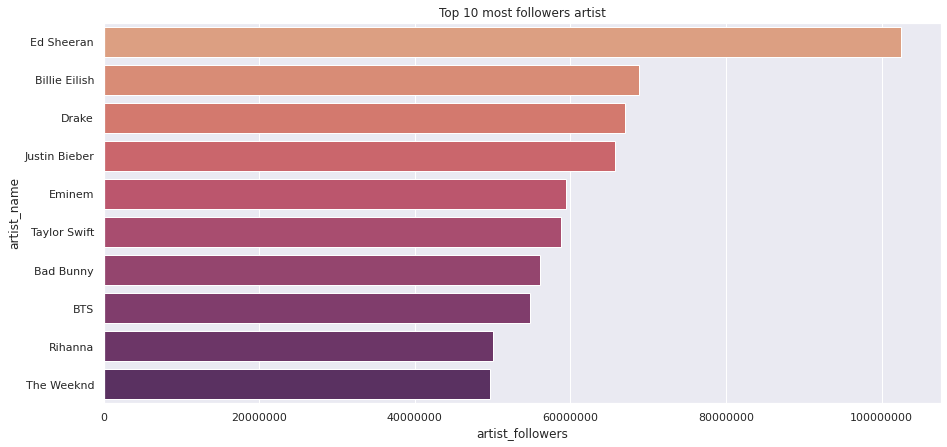

In [ ]:
most_fol = pd.DataFrame(df.sort_values(by=['artist_followers'], ascending=False)[['artist_followers','artist_name']]).drop_duplicates().head(10)
plt.figure(figsize=(15,7))
plt.ticklabel_format(style='plain', axis='x') # ให้ ticklabel แกน x ไม่ลดรูปเหลือทศนิยม
sns.barplot(y='artist_name', x='artist_followers', data = most_fol, palette="flare").set(title="Top 10 most followers artist")

ทำการสร้างฟังก์ชั่นเพื่อนับ element ใน list ของ column df['genres'] และหา 20 อันดับแรกของแนวเพลง

In [ ]:
def genres(series):
 return pd.Series([x for items in series for x in items])
genres(df['genres']).value_counts().head(20)

pop                      324
rap                      187
dance pop                165
hip hop                  111
contemporary country     111
country                  101
country road              77
pop rap                   72
trap                      69
canadian pop              41
post-teen pop             40
southern hip hop          40
musica mexicana           38
r&b                       37
electropop                35
modern rock               35
nueva musica mexicana     35
urban contemporary        35
alternative metal         29
canadian hip hop          28
dtype: int64

plot ออกมาเป็น bar graph จะเห็นได้ว่าแนวเพลง pop นั้นมีจำนวนมากกว่าแนวเพลงอื่นๆอยู่มาก

Text(0, 0.5, 'Genres')

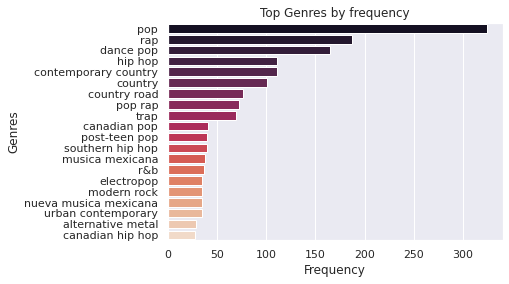

In [ ]:
plt.title("Top Genres by frequency")
sns.color_palette("crest", as_cmap=True)
sns.barplot(y=genres(df['genres']).value_counts().index[:20], x=genres(df['genres']).value_counts().values[:20], data=df,palette='rocket')
plt.xlabel("Frequency")
plt.ylabel("Genres")

สร้าง 2 dataframe df_2010 คือ dataframe ที่ประกอบไปด้วยเพลงในปี 2010 

ส่วน df_2021 คือ dataframe ที่ประกอบไปด้วยเพลงในปี 2021 

In [ ]:
df_2010 = df.query("release_year=='2010'")
df_2021 = df.query("release_year=='2021'")

ทำการ plot bar graph ของแนวเพลง 20 อันดับแรกโดยใช้ dataframe ของเพลงในปี 2010

Text(0, 0.5, 'Genres')

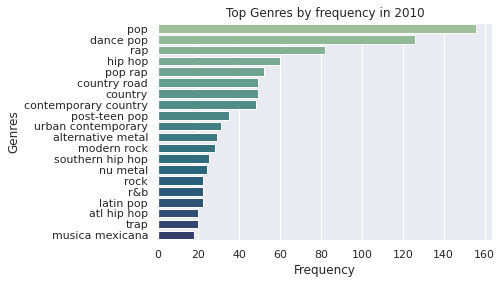

In [ ]:
plt.title("Top Genres by frequency in 2010")
sns.barplot(y=genres(df_2010['genres']).value_counts().index[:20], x=genres(df_2010['genres']).value_counts().values[:20], data=df,palette='crest')
plt.xlabel("Frequency")
plt.ylabel("Genres")

ทำการ plot bar graph ของแนวเพลง 20 อันดับแรกโดยใช้ dataframe ของเพลงในปี 2021 เพื่อเปรียบเทียบ

Text(0, 0.5, 'Genres')

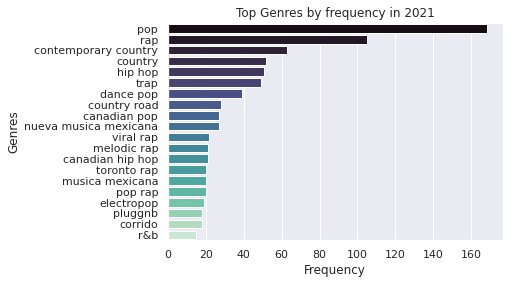

In [ ]:
genres(df_2021.genres).value_counts().head(20)
plt.title("Top Genres by frequency in 2021")
sns.color_palette("mako", as_cmap=True)
sns.barplot(y=genres(df_2021['genres']).value_counts().index[:20], x=genres(df_2021['genres']).value_counts().values[:20], data=df, palette="mako")
plt.xlabel("Frequency")
plt.ylabel("Genres")

จะเห็นได้ว่าผ่านไปเกือบ 10 ปี แนวเพลงที่มากที่สุดยังคงเป็นแนวเพลง pop และปัจจุบันแนวเพลง rap และ trap กำลังเป็นที่นิยมและมีแนวเพลงแยกย่อยมากขึ้น

--------------------------------------------------------------------------------------

ทำการ plot correlation matrix ของ tracks' feature

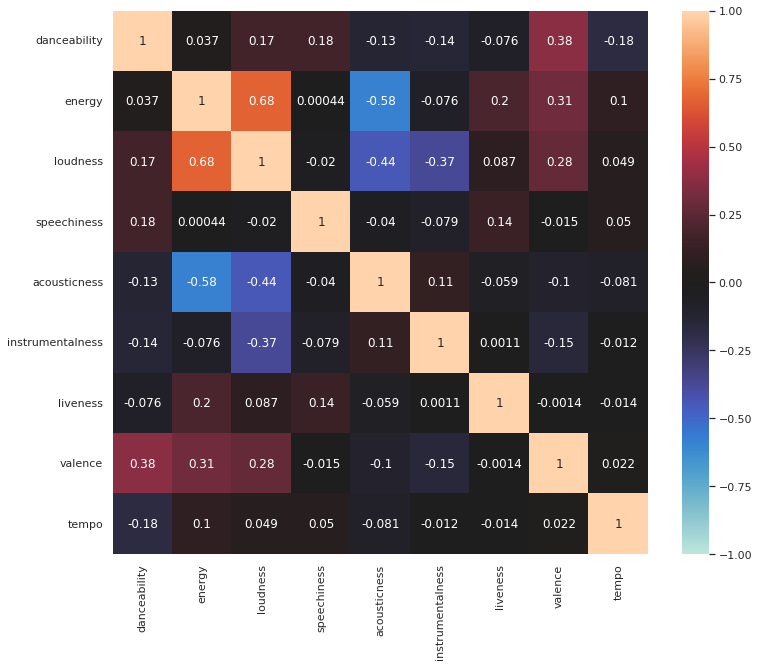

In [ ]:
corr_df = df.drop(["track_popularity","artist_popularity","artist_followers"],axis=1)
sns.set(rc = {'figure.figsize':(12,10)})
sns.heatmap(corr_df.corr(), annot=True,vmin=-1,vmax=1,center=0) #heatmap() function to create correlation map
plt.show()

โดย -1 แสดงถึงตัวแปรที่มีความสัมพันธ์น้อยที่สุด ในขณะที่ค่าที่สูงกว่า 0.0 หมายถึงตัวแปรที่มีความสัมพันธ์เชิงบวก

ใช้คำสั่ง regplot เพื่อ plot ค่าความสัมพันธ์ของ loudness กับ energy

[Text(0.5, 1.0, 'loudness vs energy')]

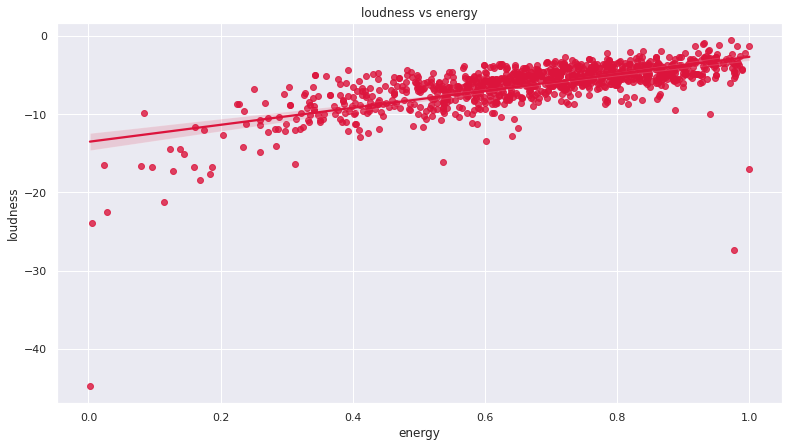

In [ ]:
plt.figure(figsize=(13,7))
sns.regplot(y = "loudness", x = "energy", data = df, color="crimson").set(title = "loudness vs energy")

มีความสัมพันธ์เชิงบวกสูงระว่างค่า loudness กับ energy 

If the energy increases, the loudness of the song increases and similarly, if the song's loudness decreases, the energy of the track also decreases. ซึ่่งหมายความว่ายิ่งเพลงนั้นมีความเสียงดังก็จะมีค่า energy มากขึ้นตามนั่นเอง

ทีนี้เราทำการดูความสัมพันธ์กันระหว่างความนิยมของเพลงกับค่า danceability ของเพลงโดยทำการ sample มา 200 ตัวอย่าง

จะเห็นได้ว่า regression line มีทิศทางสูงขึ้นเล็กน้อย ซึ่งหมายความว่ายิ่งเพลงมีค่า danceability มากเพลงนั้นก็จะมีความนิยมมากขึ้น

[Text(0.5, 1.0, 'Track popularity vs danceability')]

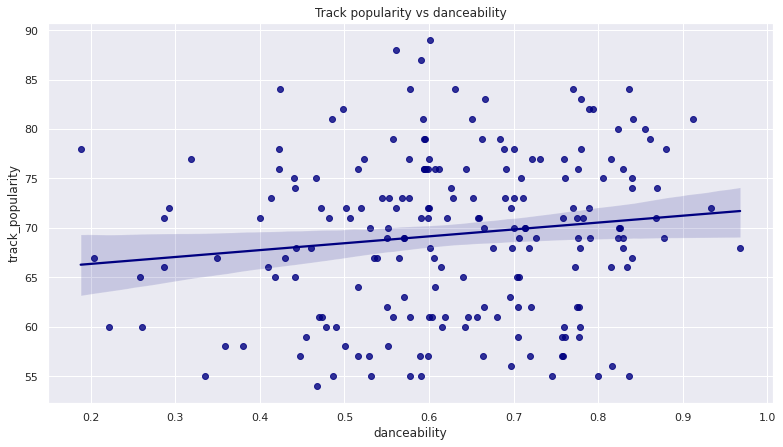

In [ ]:
plt.figure(figsize=(13,7))
sample_df = df.sample(n=200,random_state=24) #random_state เพื่อให้ค่าออกมาเหมือนเดิมแม้ทำการรันใหม่
sns.regplot(data = sample_df, y = "track_popularity", x = "danceability", color = "navy").set(title = "Track popularity vs danceability")

สร้าง df สำหรับเก็บค่าเฉลี่ยของแต่ละ feature ของเพลงโดยแยกเป็นของปี 2021 และ 2010

In [ ]:
track_2021_df = df.query("release_year == '2021'")
dance_2021 = track_2021_df['danceability'].mean()
acou_2021 = track_2021_df['acousticness'].mean()
energy_2021 = track_2021_df['energy'].mean()
speech_2021 = track_2021_df['speechiness'].mean()
instru_2021 = track_2021_df['instrumentalness'].mean()
live_2021 = track_2021_df['liveness'].mean()
valence_2021 = track_2021_df['valence'].mean()

track_2010_df = df.query("release_year == '2010'")
dance_2010 = track_2010_df['danceability'].mean()
acou_2010 = track_2010_df['acousticness'].mean()
energy_2010 = track_2010_df['energy'].mean()
speech_2010 = track_2010_df['speechiness'].mean()
instru_2010 = track_2010_df['instrumentalness'].mean()
live_2010 = track_2010_df['liveness'].mean()
valence_2010 = track_2010_df['valence'].mean()

ทำการ import library plotly เพื่อช่วยในการสร้าง radar chart

In [ ]:
import plotly.graph_objects as go

categories = ['danceability','energy','speechiness', 'acousticness', 'instrumentalness', 'liveness','valence']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[dance_2021, energy_2021, speech_2021, acou_2021, instru_2021, live_2021, valence_2021],
      theta=categories,
      fill='none',
      name='2021s tracks'
))


fig.add_trace(go.Scatterpolar(
      r=[dance_2010, energy_2010, speech_2010, acou_2010, instru_2010, live_2010, valence_2010],
      theta=categories,
      fill='none',
      name='2010s tracks'
))

fig.update_layout(title=go.layout.Title(text='2021s vs 2010s tracks feature comparison'),title_x=0.47,
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True
)
fig.show()

เพลงในปี 2010 จะเฉลี่ยแล้วมีค่า energy มากกว่าอย่างเห็นได้ชัด แต่จะมีค่า danceability, speechiness และ acousticness น้อยกว่าเพลงในปี 2021 ซึ่งหมายความว่าเพลงในปี 2021 นั้นจะมีความเป็น acoustic มากขึ้นเมื่อเทียบกับปี 2010 และมู้ดของเพลงในปี 2021 จะมาในโทนเศร้ามากกว่าเพลงในปี 2010 เล็กน้อยโดยดูจากค่า valence หรือก็คือเพลงในปี 2010 นั้นมีความสนุกมีเอเนอจี้มากกว่าเพลงในปี 2021 นั่งเอง

ทีนี้เราจะทำการ plot histogram เพื่อดูว่าในเพลงที่มีความยอดนิยมติดอันดับ 200 ในปี 2021 นั้นมีค่าเป็นอย่างไรบ้าง อย่างแรกเราทำการสร้าง dataframe ของเพลงที่มี track popularity 200 อันดับแรกของ dataset df_2021 ก่อน

In [ ]:
df2021_top200 = df_2021.sort_values(by=['track_popularity'], ascending=False).head(200)

ทำการ plot histogram โดยใช้ function ของ library seaborn .histplot() โดยทำการ plot histogram เพื่อดูค่า danceability energy และ loudness

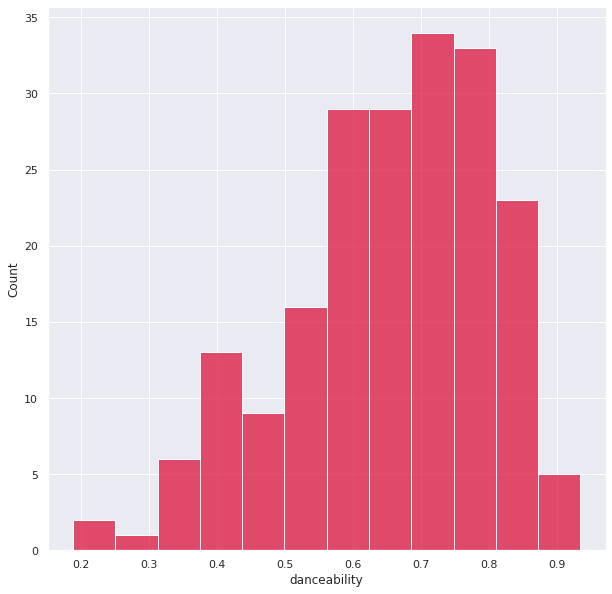

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(data=df2021_top200, x="danceability", color="crimson")

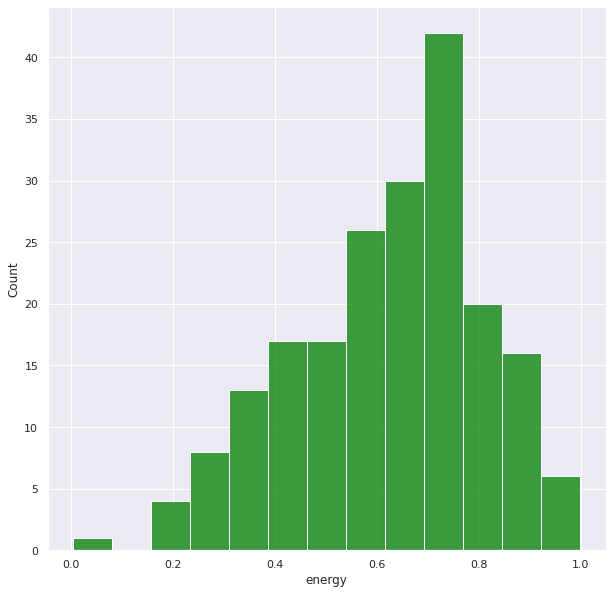

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(data=df2021_top200, x="energy", color="green")

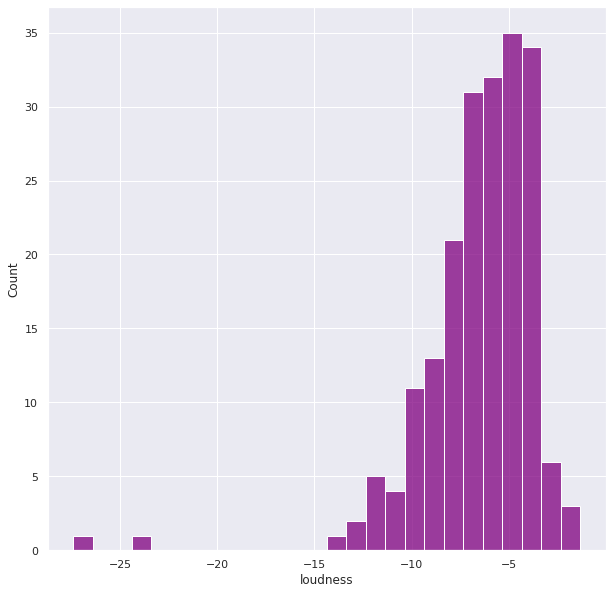

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(data=df2021_top200, x="loudness", color="purple")

ผลปรากฏว่า Danceability, Energy และ Loudness ของเพลงฮิตที่ติดชาร์ต Top 200 ค่อนข้างเบ้ไปทางซ้าย หมายความว่า เพลงที่ติดชาร์ตส่วนใหญ่ มักมีความชวนให้สนุก มี energy สูงๆ และเสียงที่ค่อนข้างจะดัง

[Text(0.5, 1.0, '2021 Valence')]

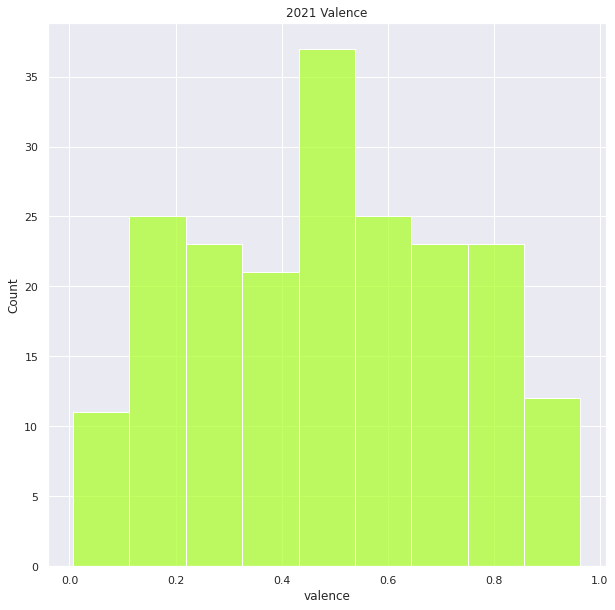

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(df2021_top200, x="valence", color="GreenYellow").set(title='2021 Valence')

โดยเฉลี่ยแล้วมู้ดเพลง top 200 ในปี 2021 นั้นออกกลางๆเฉลี่ยๆกันไป

[Text(0.5, 1.0, '2010 Valence')]

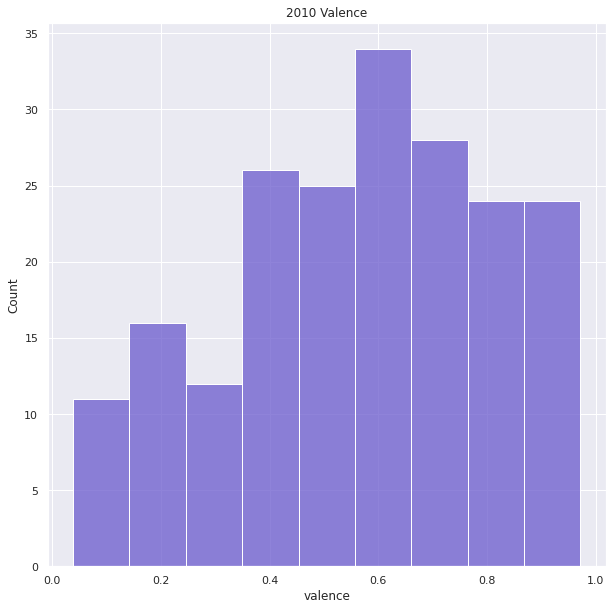

In [ ]:
df2010_top200 = df_2010.sort_values(by=['track_popularity'], ascending=False).head(200)
plt.figure(figsize=(10,10))
sns.histplot(df2010_top200, x="valence", color="SlateBlue").set(title='2010 Valence')

เมื่อเทียบกับปี 2021 แล้วค่า valence ของเพลงในปี 2010 นั้นเบ้ซ้ายซึ่งหมายความว่าเพลง top chart 200 ของปี 2010 นั้นมี mood and tone ที่เศร้าน้อยกว่าปัจจุบัน

**สรุป**

 **pop เป็นแนวเพลงที่มีความนิยมมากที่สุดทั้งในปี 2010 และ 2021** **อย่างไรก็ตามเพลงในปี 2021 ก็มีความแตกต่างจากเพลงในปี 2010 ทั้งในด้านของความสนุก** **ของเพลง หรือ character ต่างๆของเพลงนั้นก็แตกต่างกัน ซึ่งค่าเหล่านั้นก็มีความสัมพันธ์กับความนิยมของเพลงอีกด้วย**

**โดยปัจจุบันผู้คนมักนิยมเพลงที่มีความสนุก beat ที่แข็งแรง เสียงที่ค่อนข้างจะดัง** **แต่อย่างไรก็ตามผู้คนในปัจจุบันก็มักฟังเพลงที่มีความเศร้ามากกว่าเมื่อเทียบกับ 10 ปีที่แล้ว**